# Imports

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas   # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, 'C:\Projects\ePodium\eegyolk') # path to helper functions
from eegyolk import helper_functions as hf # library useful for eeg and erp data cleaning

# Load data

First the pathways are defined. Those need to be changed in order to run the code. 

In [2]:
# VARIABLES:
path_metadata = "F:\\Stage\\ePODIUM\\Data\\metadata\\"
path_excelFiles = "F:\\Stage\\ePODIUM\\Data\\metadata\\"
path_eeg = "F:\\Stage\\ePODIUM\\Data\\not_zip\\"
path_event = "F:\\Stage\\ePODIUM\\Data\\not_zip\\event_markers"
MakeExcelFiles = True # Option to put .txt files into Excel files

Load all meta data files and EEG files

In [3]:
def loadmetadata(filename):
    originalpath = path_metadata + filename + '.txt'    
    if os.path.exists(originalpath):  
        metadata = pandas.read_table(originalpath)
        if(MakeExcelFiles):
            excelpath = path_excelFiles + filename + '.xlsx'       
            metadata.to_excel(excelpath)            
        return metadata            
    else: 
        print("PATH NOT FOUND:  " + originalpath) 
        return None

cdi = loadmetadata("cdi")
children = loadmetadata("children")
parents = loadmetadata("parents")

# Process Sound Event Codes file
codes_overview = loadmetadata("CODES_overview")

# cdi
# children
parents
#CODES_overview

,child,emt_mother,klepel_mother,vc_mother,dyslexia_mother_accToMother,emt_father,klepel_father,vc_father,dyslexia_father_accToFather
0,101,105,101,19,Nee,80,64,10,Ja
1,102,116,112,24,Nee,116,94,24,Nee
2,103,90,100,22,Nee,81,65,21,Ja
3,104,81,54,19,Ja,101,77,24,Nee
4,105,101,79,22,Ja,116,101,23,Nee
...,...,...,...,...,...,...,...,...,...
72,173,96,107,23,Nee,?,?,?,?
73,174,?,?,?,?,82,81,18,Nee
74,175,116,108,22,Nee,?,?,?,?
75,176,114,112,21,Nee,?,?,?,?


In [4]:
eeg = []
eeg_filenames = []
eeg_filelocation = []

for root, dirs, files in os.walk(path_eeg):
    for file in files:
        if file.endswith('.bdf') and len(file) == 8:
            bdffile = mne.io.read_raw_bdf(root+'\\'+file) # use os.path join
            eeg.append(bdffile)              
            eeg_filenames.append(file.replace(".bdf", ""))
            eeg_filelocation.append(root+'\\'+file) # os path
            # clear_output(wait=True)            
print(len(eeg), "EEG files loaded")

eeginfo = True
if(eeginfo):
    index = 7
    print('File Location: ',eeg_filelocation[index],'\n')
    print(eeg[index],'\n')
    print(eeg[index].info)

Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\101to110\101to110\101\101a\101a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\101to110\101to110\101\101b\101b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\101to110\101to110\102\102a\102a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\101to110\101to110\102\102b\102b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\101to110\101to110\103\103a\103a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\101to110\101to110\103\10

Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\131to140\131to140\135\135b\135b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\131to140\131to140\136\136a\136a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\131to140\131to140\136\136b\136b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\131to140\131to140\137\137a\137a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\131to140\131to140\137\137b\137b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\n

Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\151to160\151to160\159\159a\159a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\151to160\151to160\159\159b\159b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\151to160\151to160\160\160a\160a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from F:\Stage\ePODIUM\Data\not_zip\151to160\151to160\160\160b\160b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
94 EEG files loaded
File Location:  F:\Stage\ePODIUM\Data\not_zip\101to110\101to110\104\104b\104b.bdf 

<RawEDF | 104b.bdf, 41 x 3794944 (1853.0 s), ~43 kB, data not loaded> 

<Info | 7 non-empty values


# Data orientation

Create a widget for index 

In [5]:
# insert widget for index
index = 8 # EEG data on a single trial of a subject
n_time_samps = eeg[index].n_times
time_secs = eeg[index].times
ch_names = eeg[index].ch_names
n_chan = len(ch_names)  
print('the (cropped) sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}.'.format(', '.join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
print('bad channels:', eeg[index].info['bads'])  # chs marked "bad" during acquisition
print(eeg[index].info['sfreq'], 'Hz')            # sampling frequency
print(eeg[index].info['description'], '\n')      # miscellaneous acquisition info

print(eeg[index].info)

the (cropped) sample data object has 4282368 time samples and 41 channels.
The last time sample is at 2090.99951171875 seconds.
The first few channel names are Fp1, AF3, F7.

bad channels: []
2048.0 Hz
None 

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-04-07 09:33:56 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>


In [6]:
# extracting data by time index for the first channel
sampling_freq = eeg[index].info['sfreq']
start_stop_seconds = np.array([11, 12])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 6
eeg_selection = eeg[index][channel_index, start_sample:stop_sample]
print(eeg_selection)

(array([[0.00567016, 0.00567057, 0.00566422, ..., 0.00564135, 0.00565401,
        0.00566407]]), array([11.        , 11.00048828, 11.00097656, ..., 11.99853516,
       11.99902344, 11.99951172]))


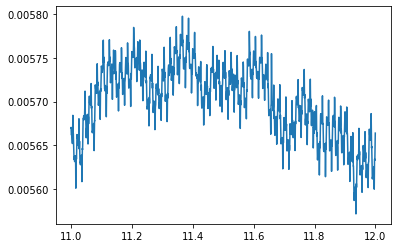

In [7]:
x = eeg_selection[1]
y = eeg_selection[0].T
plt.plot(x, y)

In [8]:
eeg[index].ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'Status']

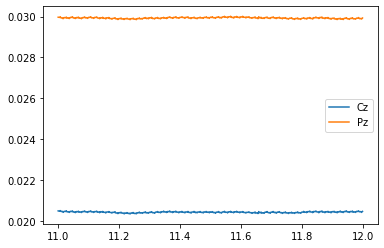

In [9]:
# extract different channels, create dual axis + widget
channel_names = ['Cz', 'Pz']
two_ch = eeg[index][channel_names, start_sample:stop_sample]
# y_offset = np.array([5e-20,0])  
x = two_ch[1]
y = two_ch[0].T # + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)


# Events

The event markers are in a seperate .txt file for each child in a separate folder. Run the code below to store all event files in one folder. 

In [10]:
## SAVE Event Markers to external .txt files:
#for i in range(len(eeg)):
#      np.savetxt((path_eeg)+"./event_markers\\" + eeg_filenames[i] + ".txt", mne.find_events(eeg[i]), fmt = '%i')
#      #clear_output(wait=True)

In [11]:
#checking if count eeg files == count event files

initial_count = 0
dir = path_event
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count) # event files

print(len(eeg_filenames)) # eeg files

94
94


In [12]:
events = [] 
events_12 = []
for i in range(len(eeg)):
    events.append(np.loadtxt(path_event+ "\\" + eeg_filenames[i] + ".txt", dtype = int))        
print(len(events), "Event Marker files loaded")

eventinfo = True
participantindex = 5
eventindex = 500
if(eventinfo):
    event_time = events[participantindex][eventindex][0]
    event_ID = events[participantindex][eventindex][2]    
    print("\nParticipant", participantindex,"heard event ID:", event_ID, 
          "after", event_time/eeg[participantindex].info['sfreq'], 'seconds', 
          'as the ' + str(eventindex) + "'th event")    
    print("\nEvent ID:", event_ID, "\nCondition:", codes_overview["condition"][event_ID], "\nStimulus Type:",
         codes_overview["stimulusType"][event_ID], "\nToken nr:", codes_overview["nrOfToken"][event_ID],"\n") 

94 Event Marker files loaded

Participant 5 heard event ID: 17 after 388.5009765625 seconds as the 500'th event

Event ID: 17 
Condition: giepMultiple 
Stimulus Type: standard2 
Token nr: 6 



Creating an event dictionary to map event IDs to trial descriptors

In [13]:
# M = Multiple / S = Single / T = Tokens            F = First / S = Standard / D = Deviant    
event_dict = {'GiepMT_FS': 1, 'GiepMT_S': 2, 'GiepMT_D': 3,'GiepST_FS': 4, 'GiepST_S': 5, 'GiepST_D': 6,
             'GopMT_FS': 7, 'GopMT_S': 8, 'GopMT_D': 9, 'GopST_FS': 10, 'GopST_S': 11, 'GopST_D': 12}

# Artifacts

In [14]:
ssp_projectors = eeg[index].info['projs']
eeg[index].del_proj()

<RawEDF | 105a.bdf, 41 x 4282368 (2091.0 s), ~43 kB, data not loaded>

40
Using matplotlib as 2D backend.
Opening raw-browser...


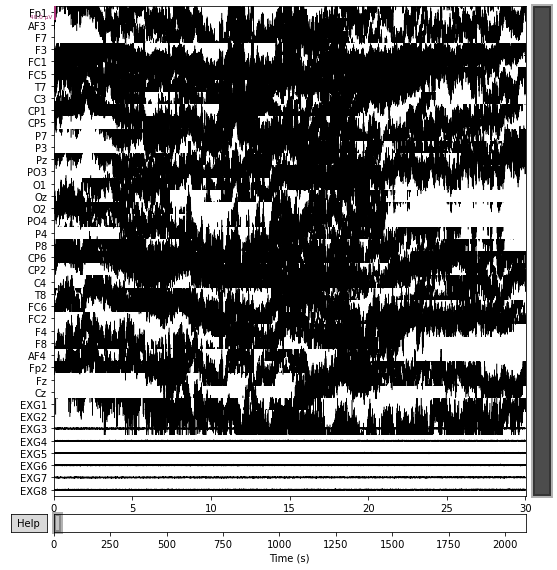

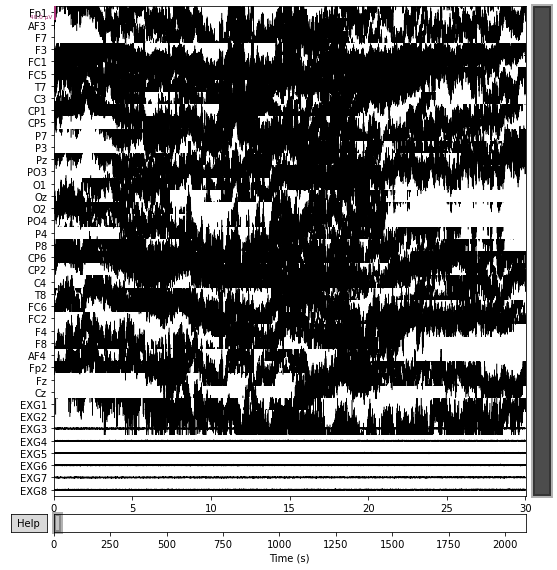

In [15]:
mag_channels = mne.pick_types(eeg[index].info, meg=False, eeg=True, stim=False, eog=False)
print(len(mag_channels))
eeg[index].plot(duration=30, order=mag_channels, n_channels=len(mag_channels),
               )#remove_dc=False)

Effective window size : 1.000 (s)


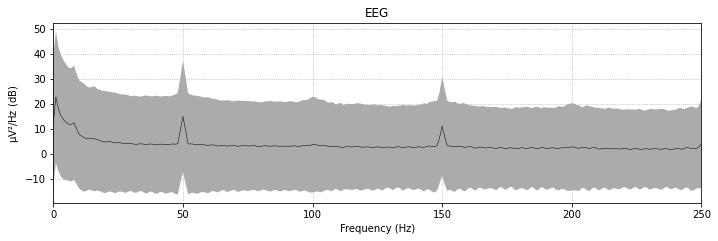

In [16]:
fig = eeg[index].plot_psd(tmax=np.inf, fmax=250, average=True)

# Filtering

In order to filter eeg data, the data needs to be filtered, substract baseline, bad channels should be removed and reject artefacts. 

In [17]:
# check and remove bad channels in all files
def removebadchannel(eeg):
    for i in eeg:
        if len(eeg[index].info['bads']) != 0:
            eeg[index] = mne.pick_types(eeg[index].info, meg=False, eeg=True, exclude='bads')
        

In [18]:
# use helper functions for bandpass filter
lowpass = widgets.BoundedFloatText(
    step=0.1,
    description='lowpass:',
    disabled=False
)


highpass = widgets.BoundedFloatText(
    step=0.1,
    description='highpass:',
    disabled=False
)

widgets.VBox([lowpass,highpass])


In [19]:
index = 5
hf.band_pass_filter(eeg[index], lowpass, highpass)

RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

# ERP substraction